請開啟任意 anaconda prompt
輸入：

conda activate finlab

pip install pyfolio==0.9.2

In [1]:
!pip install pyfolio==0.9.2

You should consider upgrading via the 'pip install --upgrade pip' command.


### Pyfolio

#### 0050測試

In [2]:
from finlab.data import Data

data = Data()

close = data.get_adj("收盤價")

close.index = close.index.tz_localize("Asia/Taipei")

In [8]:
close['0050']

date
2007-04-23 00:00:00+00:00    57.85
2007-04-24 00:00:00+00:00    58.10
2007-04-25 00:00:00+00:00    57.60
2007-04-26 00:00:00+00:00    57.70
2007-04-27 00:00:00+00:00    57.50
2007-04-30 00:00:00+00:00    56.90
2007-05-02 00:00:00+00:00    57.55
2007-05-03 00:00:00+00:00    58.20
2007-05-04 00:00:00+00:00    59.20
2007-05-07 00:00:00+00:00    59.55
2007-05-08 00:00:00+00:00    59.30
2007-05-09 00:00:00+00:00    58.95
2007-05-10 00:00:00+00:00    59.25
2007-05-11 00:00:00+00:00    58.60
2007-05-14 00:00:00+00:00    58.75
2007-05-15 00:00:00+00:00    58.15
2007-05-16 00:00:00+00:00    58.20
2007-05-17 00:00:00+00:00    58.60
2007-05-18 00:00:00+00:00    58.50
2007-05-21 00:00:00+00:00    59.60
2007-05-22 00:00:00+00:00    59.80
2007-05-23 00:00:00+00:00    60.05
2007-05-24 00:00:00+00:00    60.10
2007-05-25 00:00:00+00:00    59.45
2007-05-28 00:00:00+00:00    59.50
2007-05-29 00:00:00+00:00    59.70
2007-05-30 00:00:00+00:00    59.25
2007-05-31 00:00:00+00:00    59.75
2007-06-01 00:0

In [3]:
close['0050'].pct_change().plot() # 每天的股價變化

/home/rossleecooloh/.pyenv/versions/3.6.6/lib/python3.6/site-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


Start date,2007-04-23
End date,2019-07-19
Total months,144
,Backtest
Annual return,6.7%
Cumulative returns,118.4%
Annual volatility,20.1%
Sharpe ratio,0.42
Calmar ratio,0.12
Stability,0.79
Max drawdown,-55.8%


/home/rossleecooloh/.pyenv/versions/3.6.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,55.75,2007-10-29,2008-11-20,2011-01-28,850
1,23.01,2011-01-28,2011-12-19,2013-05-16,600
2,20.96,2015-04-27,2015-08-24,2016-08-08,336
3,17.53,2018-08-30,2019-01-04,NaT,NaN
4,14.55,2007-07-25,2007-08-16,2007-10-02,50


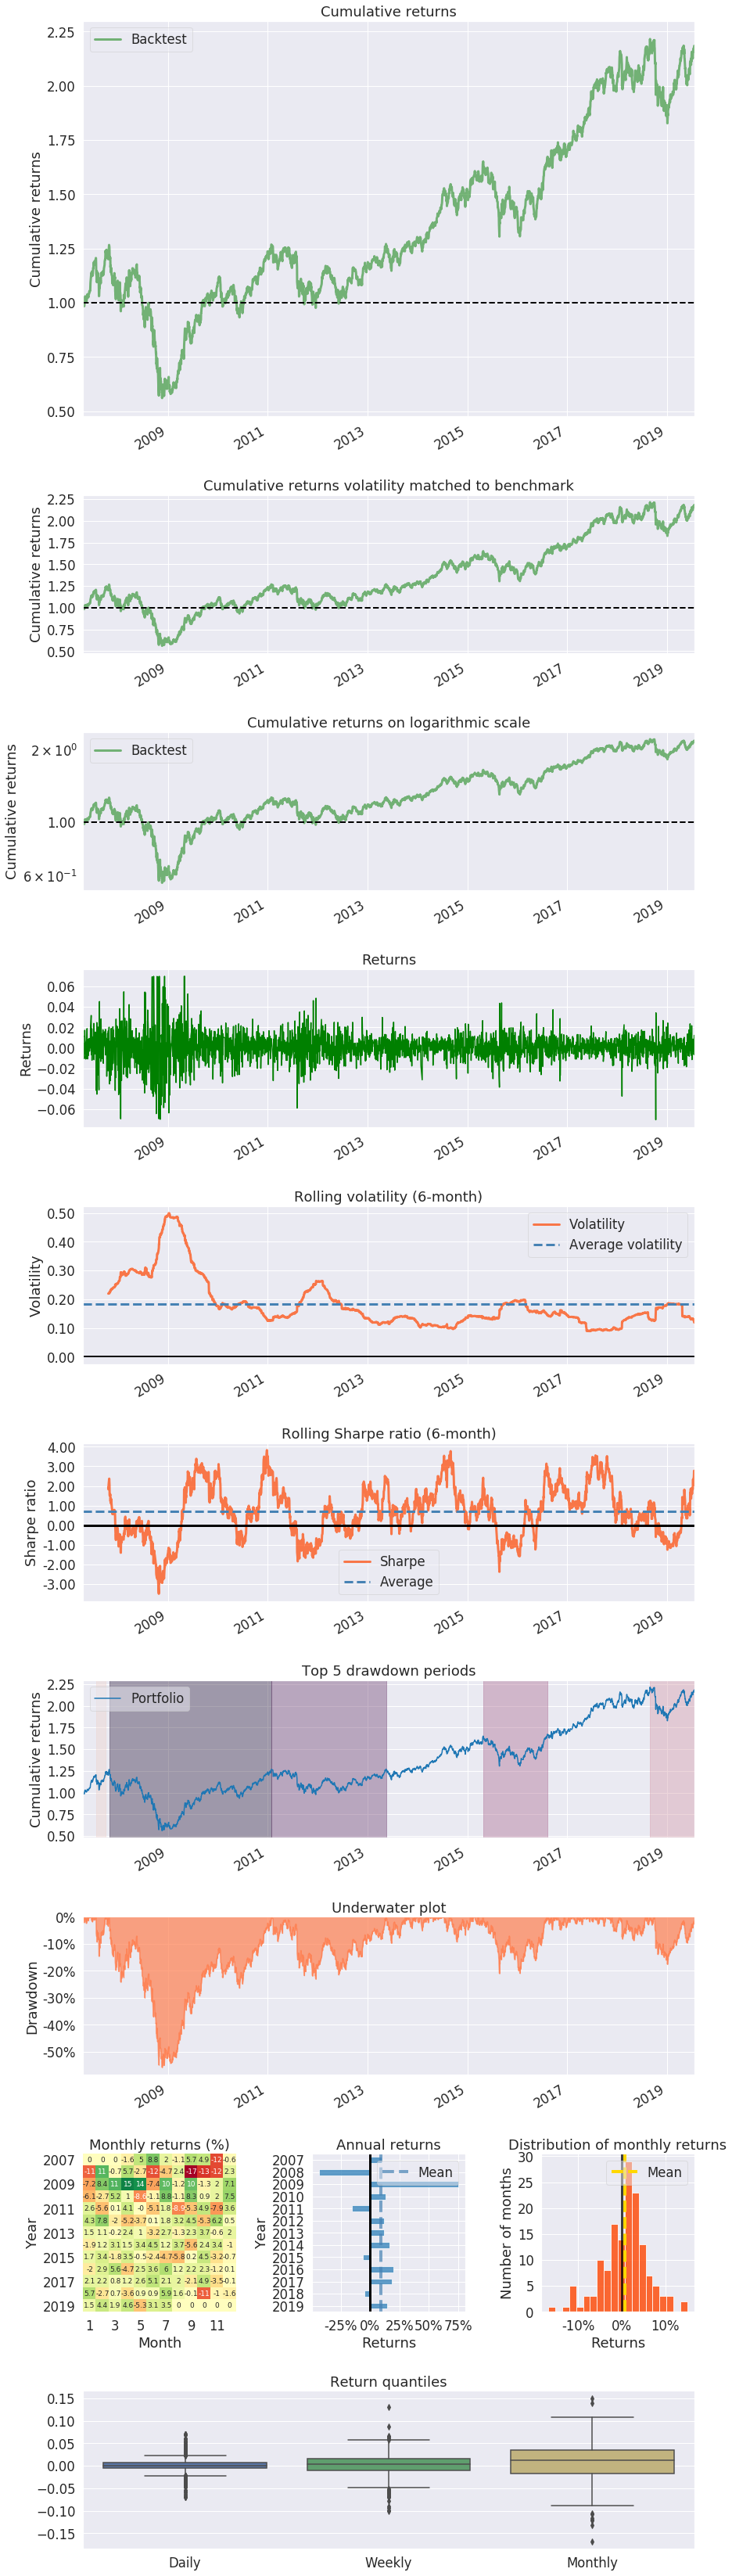

In [4]:
import pyfolio as pf

pf.create_returns_tear_sheet(close['0050'].pct_change())

0.9.2


Start date,2007-04-24
End date,2019-07-19
Total months,144
,Backtest
Annual return,3.0%
Cumulative returns,43.5%
Annual volatility,20.3%
Sharpe ratio,0.25
Calmar ratio,0.05
Stability,0.52
Max drawdown,-59.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,58.97,2007-10-11,2008-11-20,2015-04-24,1967
1,23.30,2015-04-27,2016-01-21,2016-10-25,392
2,18.23,2018-01-23,2019-01-04,NaT,NaN
3,14.55,2007-07-25,2007-08-16,2007-10-02,50
4,5.45,2017-11-07,2017-12-26,2018-01-18,53


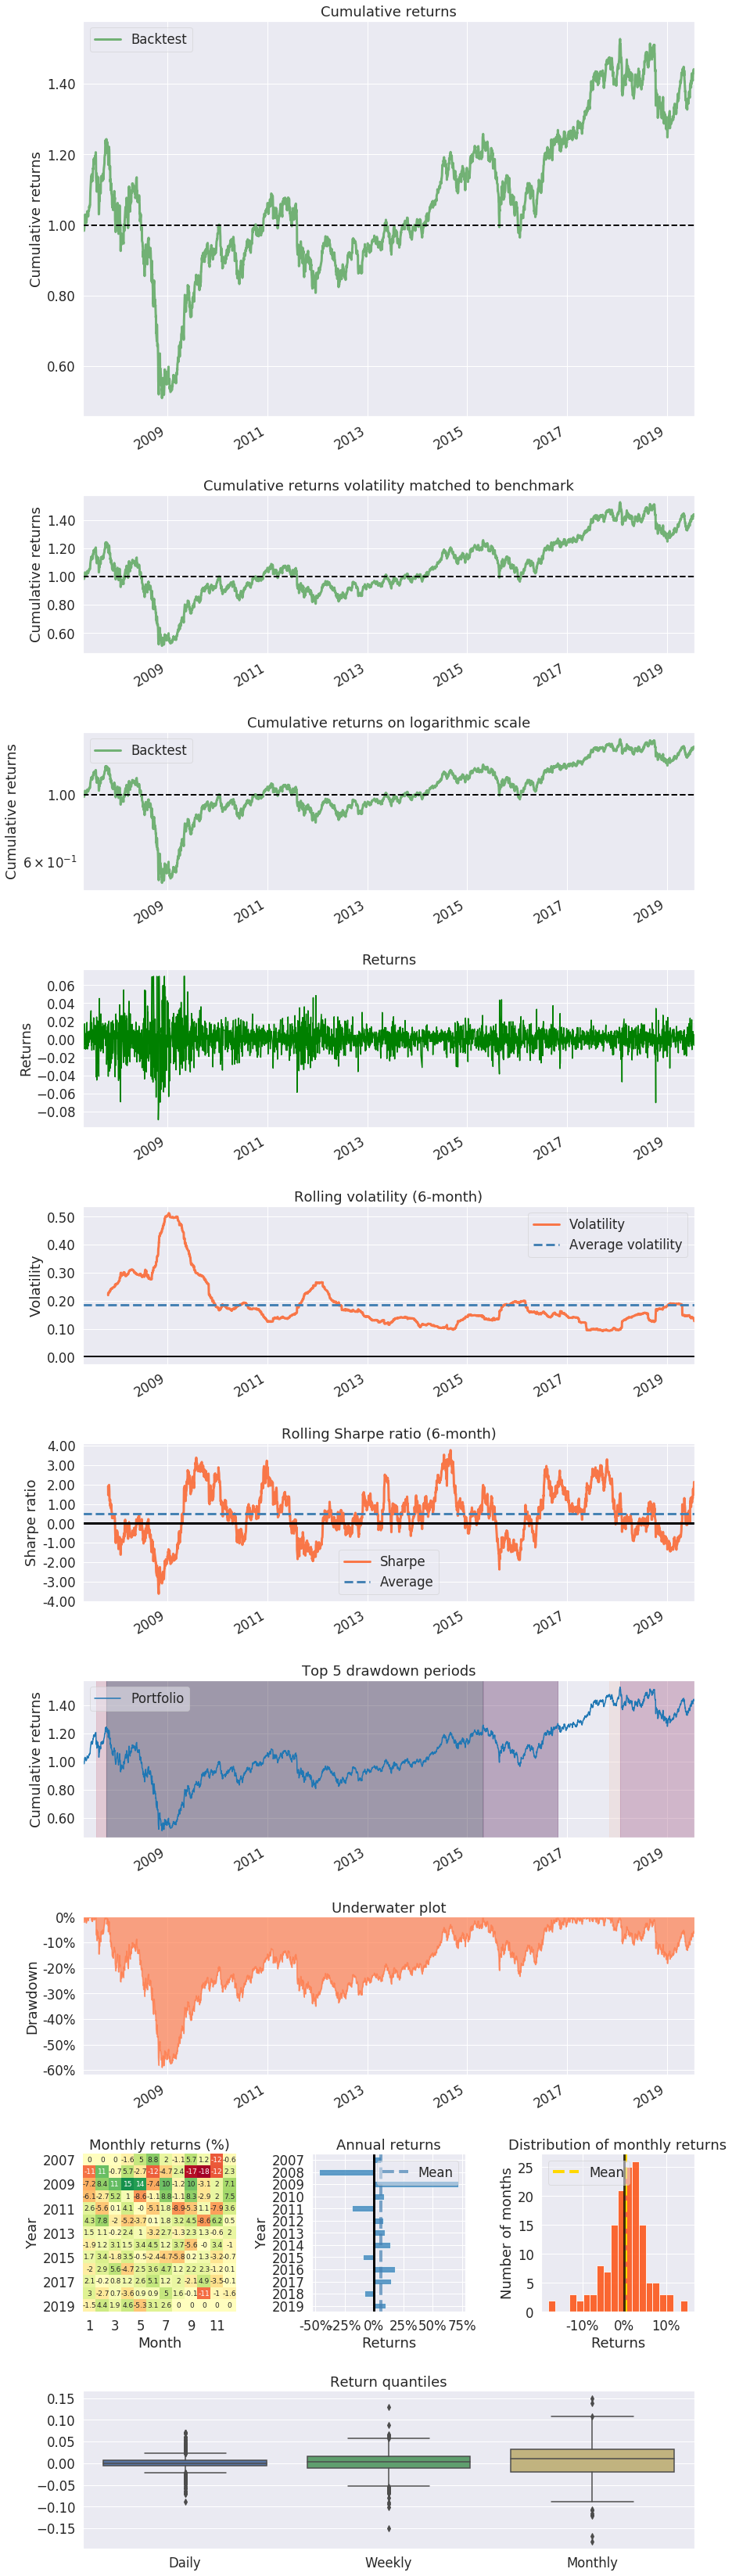

In [5]:
from finlab.data import Data
import pyfolio as pf
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

data = Data()
close = data.get('收盤價')
close.index = pd.to_datetime(close.index).tz_localize('utc')
rets = close['0050'].pct_change().dropna()

print(pf.__version__)
%matplotlib inline
k = pf.create_returns_tear_sheet(rets)


### Strategy Analysis
把上個單元的策略拿進來分析看看

In [9]:
creturns["ret"]

date
2007-04-23    1.000000
2007-04-24    1.000000
2007-04-25    1.000000
2007-04-26    1.000000
2007-04-27    1.000000
2007-04-30    1.000000
2007-05-02    1.000000
2007-05-03    1.000000
2007-05-04    1.000000
2007-05-07    1.000000
2007-05-08    1.000000
2007-05-09    1.000000
2007-05-10    1.000000
2007-05-11    1.000000
2007-05-14    1.000000
2007-05-15    1.000000
2007-05-16    1.000000
2007-05-17    1.000000
2007-05-18    1.000000
2007-05-21    1.000000
2007-05-22    1.000000
2007-05-23    1.000000
2007-05-24    1.000000
2007-05-25    1.000000
2007-05-28    1.000000
2007-05-29    1.000000
2007-05-30    1.000000
2007-05-31    1.000000
2007-06-01    1.000000
2007-06-04    1.000000
                ...   
2019-06-10    2.996423
2019-06-11    2.996423
2019-06-12    2.996423
2019-06-13    2.996423
2019-06-14    2.996423
2019-06-17    2.996423
2019-06-18    2.996423
2019-06-19    2.996423
2019-06-20    2.996423
2019-06-21    2.996423
2019-06-24    2.996423
2019-06-25    2.996423
2019-0

Start date,2007-04-23
End date,2019-07-19
Total months,144
,Backtest
Annual return,9.6%
Cumulative returns,199.6%
Annual volatility,11.0%
Sharpe ratio,0.89
Calmar ratio,0.71
Stability,0.97
Max drawdown,-13.5%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,13.51,2012-02-29,2012-06-04,2012-08-22,126
1,11.76,2012-09-19,2012-10-31,2013-01-10,82
2,11.27,2018-06-07,2018-12-25,NaT,NaN
3,11.18,2014-09-23,2014-10-16,2015-04-24,154
4,8.23,2016-03-22,2016-05-13,2016-06-30,73


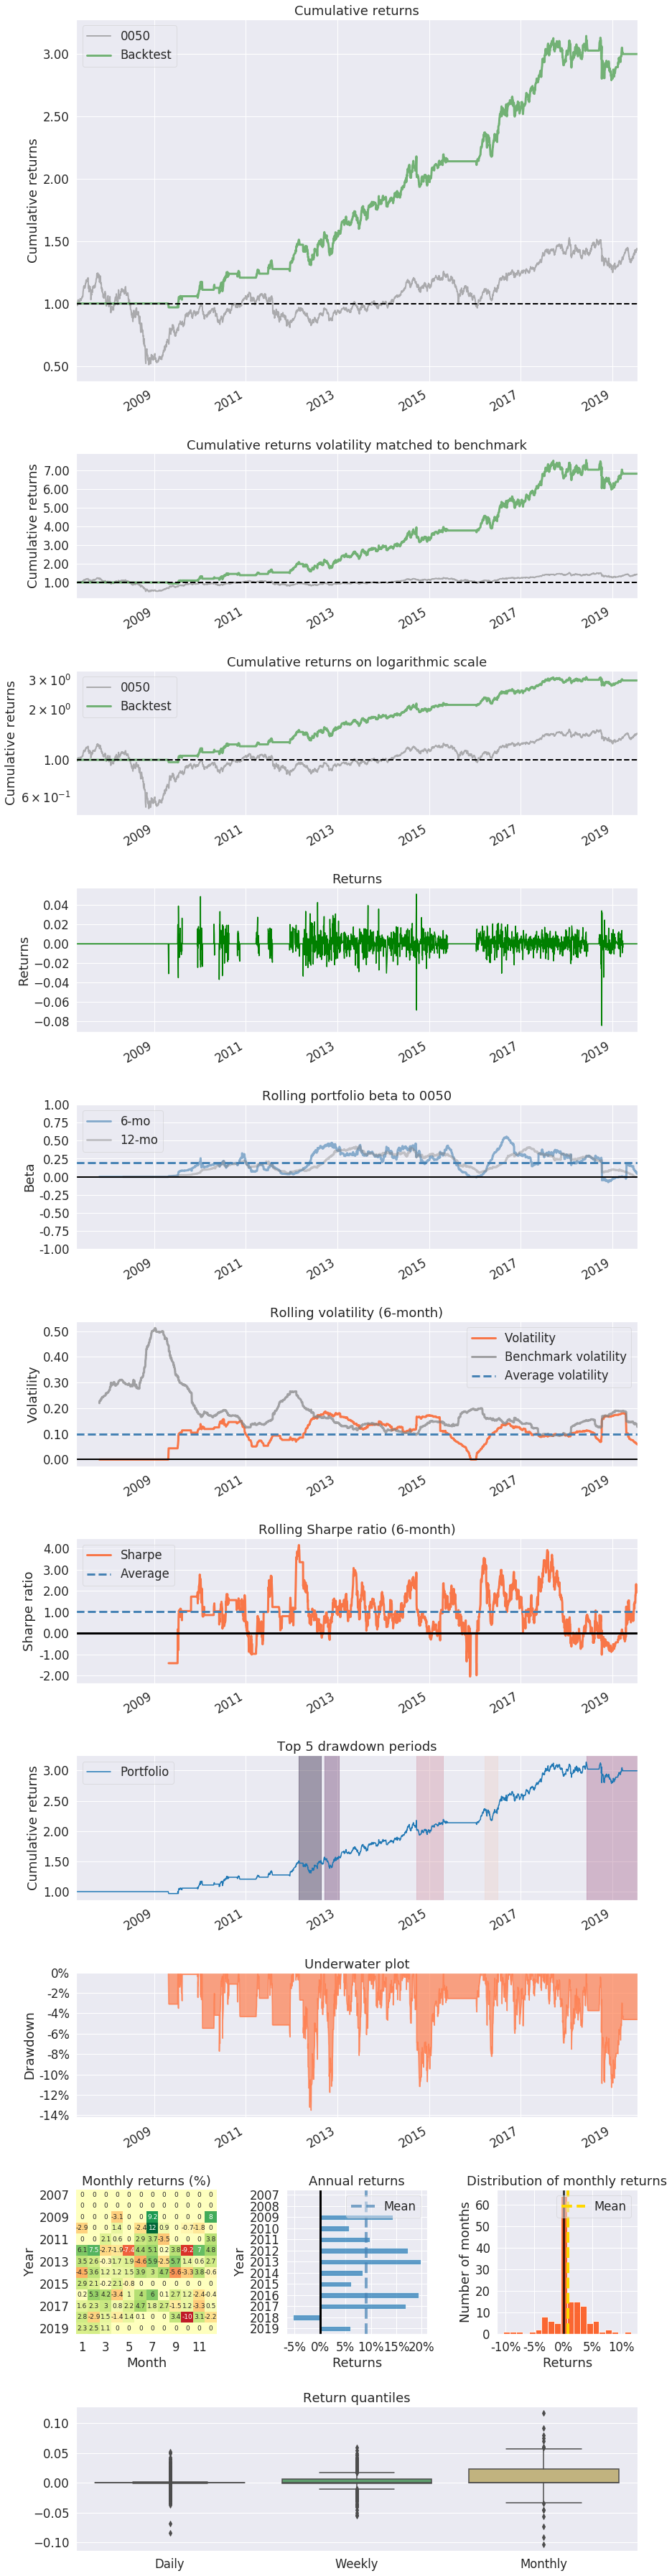

In [7]:
creturns = pd.read_pickle("20200202_考慮手續費的蠟燭線回測績效.pkl")

daily_return = creturns["ret"].pct_change()
# daily_return.index = daily_return.index.tz_localize('Asia/Taipei')
daily_return.index = daily_return.index.tz_localize('utc')

pf.create_returns_tear_sheet(returns=daily_return, benchmark_rets=close['0050'].pct_change())